In [1]:
from financeiro import AIFinancial, FinancialData
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

## Extraindo dado

In [2]:
ativos = ["IRBR3.SA", "AAPL34.SA", "CSNA3.SA", "CESP6.SA", "TEND3.SA"]

In [3]:
fi = FinancialData()

In [4]:
date_train = ("2017-11-03", "2019-11-03")
date_test = ("2019-11-03", "2020-11-03")
train = fi.extract_data_from_actives(ativos, date_train, "yahoo")
test = fi.extract_data_from_actives(ativos, date_test, "yahoo")

In [5]:
train.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-03,10.332370,12.292687,6.622097,11.140564,8.242818
2017-11-06,10.492818,12.351051,6.970628,11.328478,7.963319
2017-11-07,10.495966,12.405088,6.671887,11.006340,7.892261
2017-11-08,10.675483,12.431026,6.862750,11.409012,7.958582
2017-11-09,10.637805,12.465922,6.514218,11.051082,7.911212


In [6]:
test.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2019-11-04,36.788086,25.170553,12.074782,27.723089,25.476824
2019-11-05,36.845207,25.067837,12.284345,27.797264,25.348951
2019-11-06,36.188278,25.427347,12.274364,27.852898,25.457151
2019-11-07,34.607838,26.251709,12.573739,27.389301,25.358788
2019-11-08,33.417744,26.952513,12.274364,27.630369,25.103035


## Verificando qualidade do dado

<AxesSubplot:ylabel='Date'>

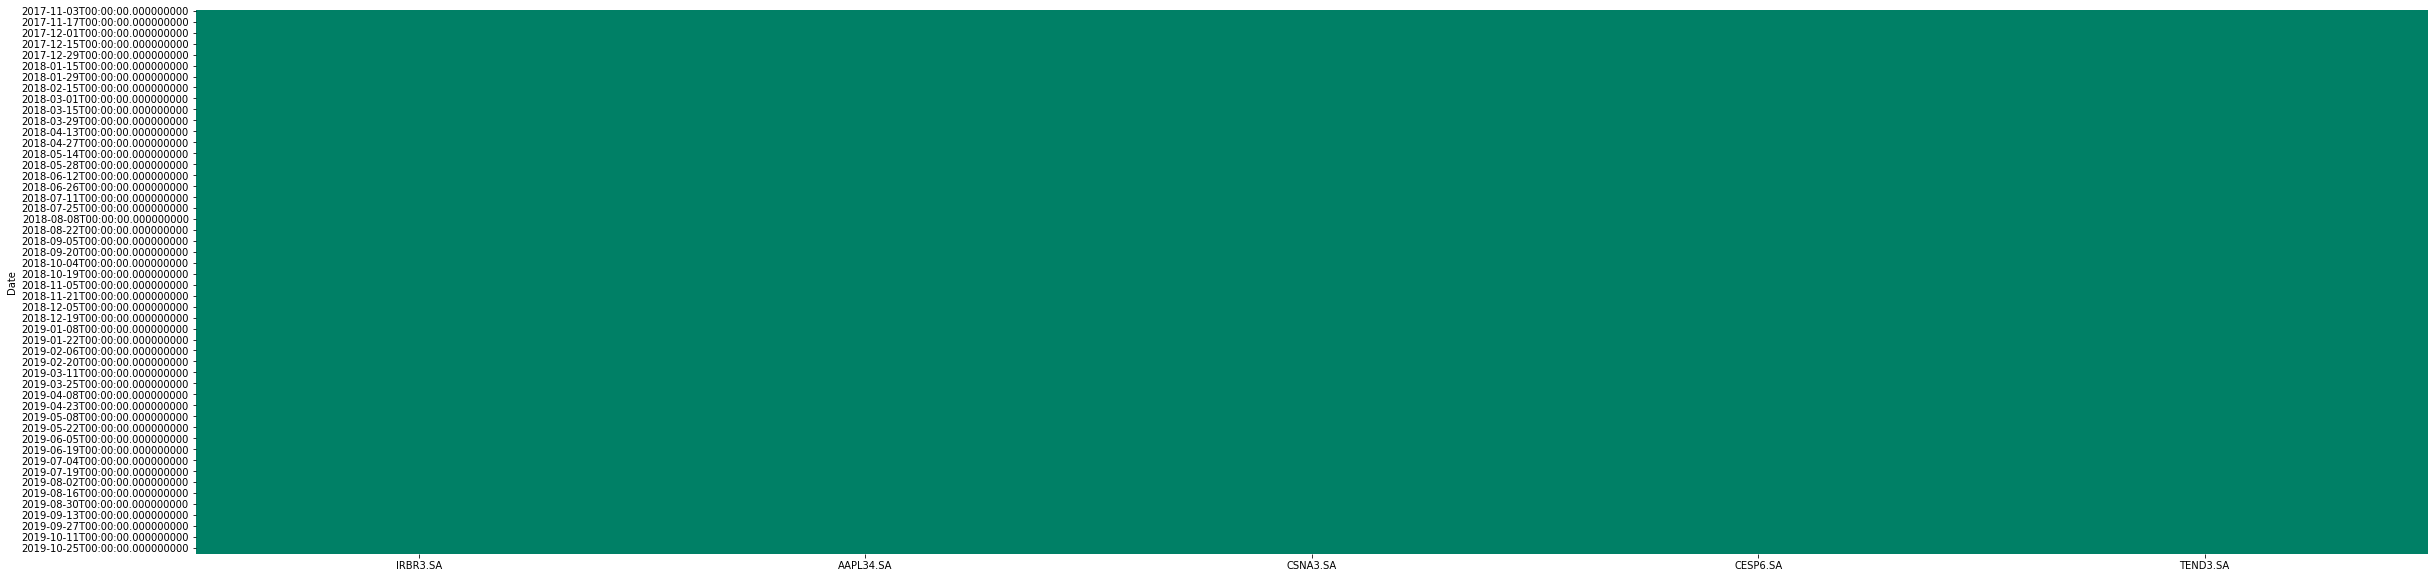

In [7]:
fi.plot_data_segmentation(train)

<AxesSubplot:ylabel='Date'>

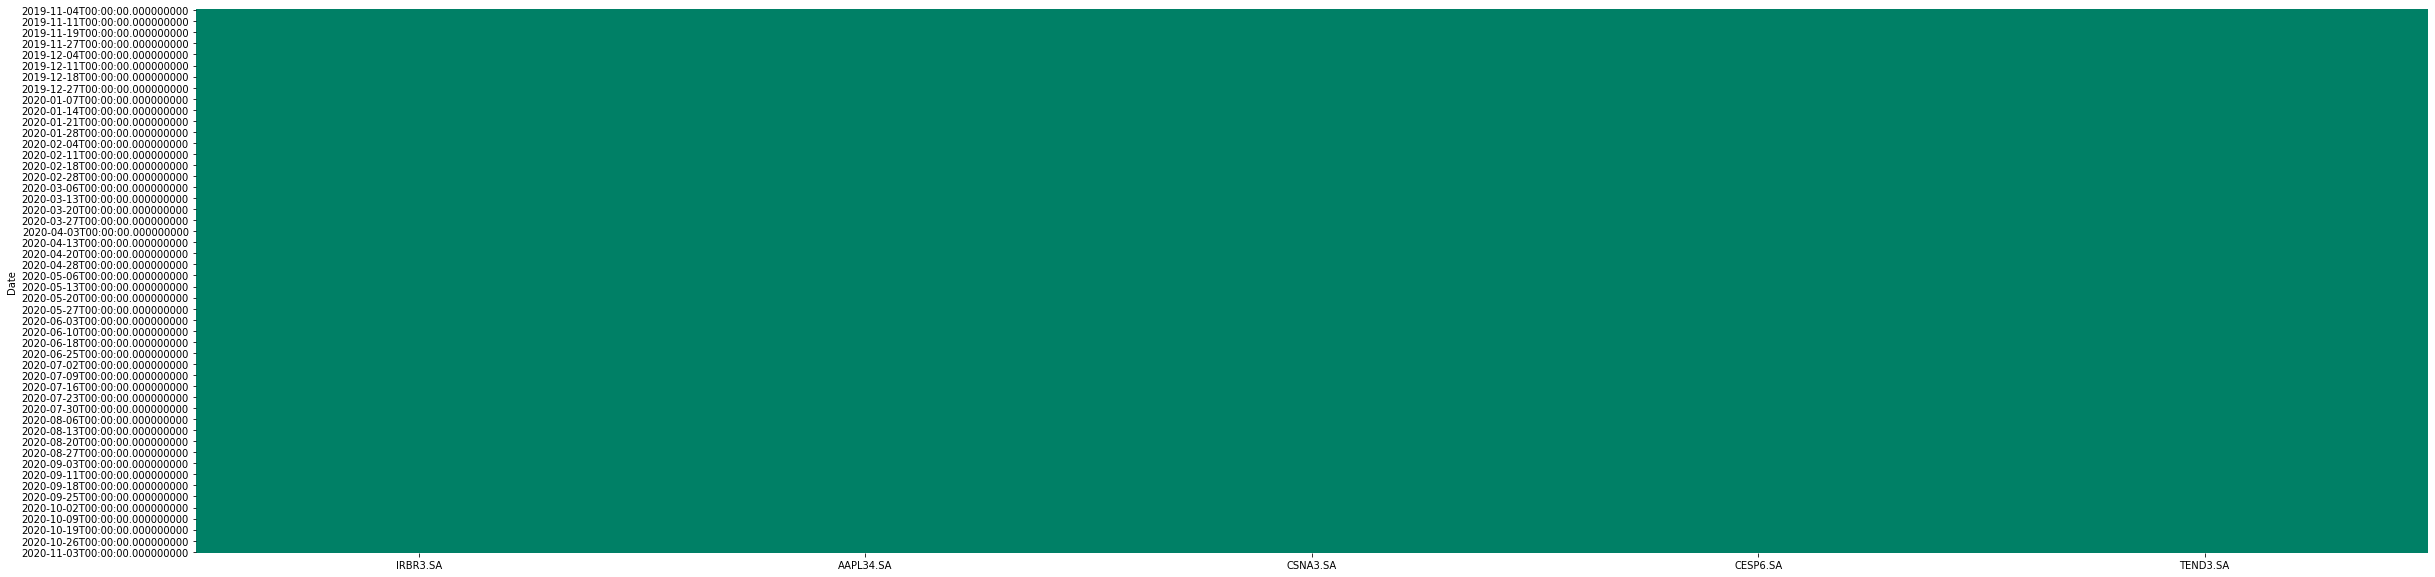

In [8]:
fi.plot_data_segmentation(test)

## Processando dados

In [9]:
train = train.dropna()
test = test.dropna()

## Média móvel curta e longa

In [10]:
short = train.rolling(window=3).mean()[4:]
long = train.rolling(window=5).mean()[4:]

In [11]:
short.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-09,10.603085,12.434012,6.682952,11.155478,7.920685
2017-11-10,10.637805,12.522997,6.583372,11.095823,7.974374
2017-11-13,10.636769,12.568982,6.472727,11.065996,8.045433
2017-11-14,10.615858,12.590910,6.351017,11.006341,8.077014
2017-11-15,10.607506,12.544131,6.276332,11.021255,8.061223


In [12]:
long.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-09,10.526888,12.389155,6.728316,11.187095,7.993638
2017-11-10,10.580440,12.465026,6.678526,11.124458,7.955741
2017-11-13,10.616351,12.508612,6.590563,11.122668,7.997428
2017-11-14,10.632172,12.533936,6.486004,11.095823,8.020167
2017-11-15,10.612090,12.554071,6.343272,10.988444,8.029642


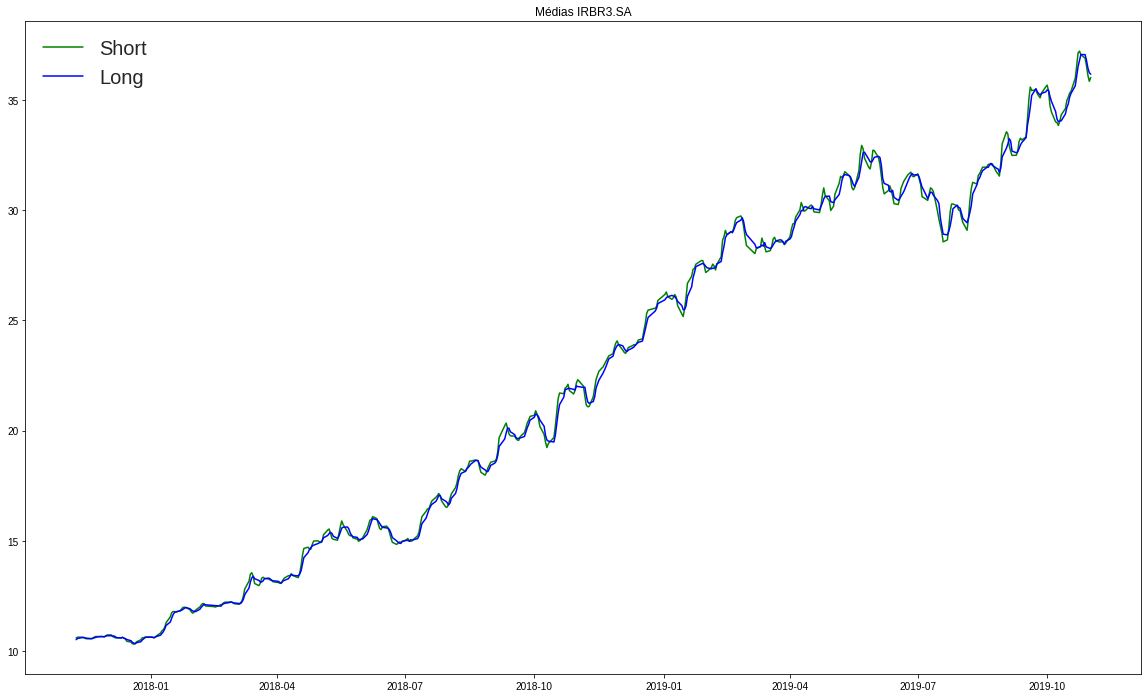

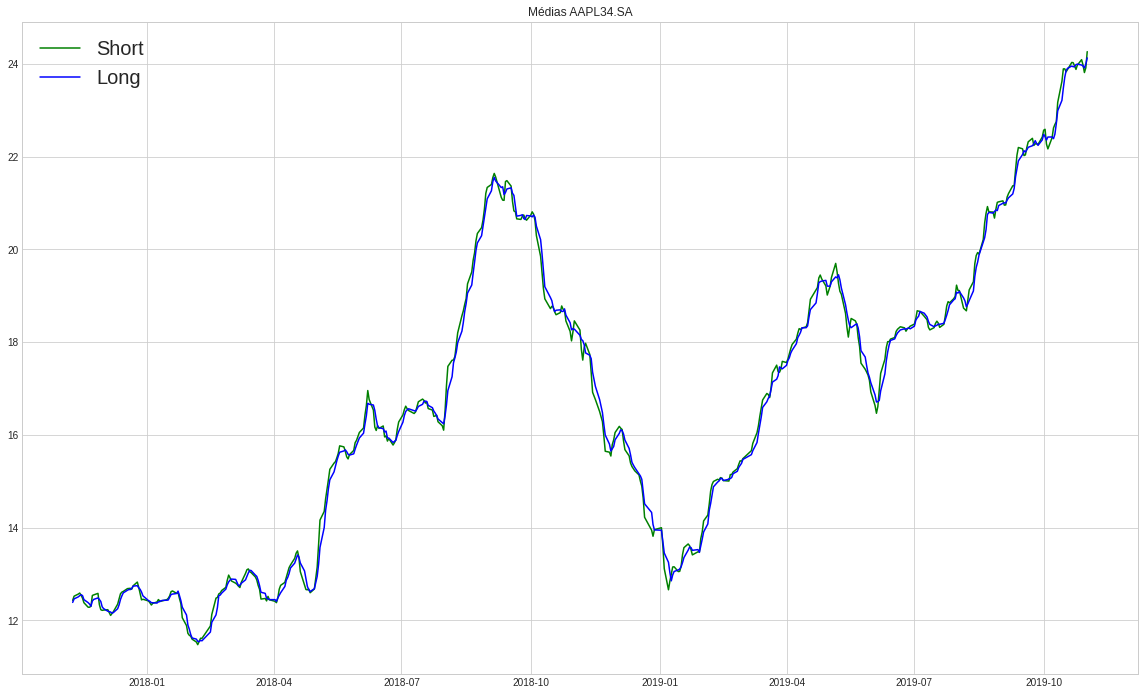

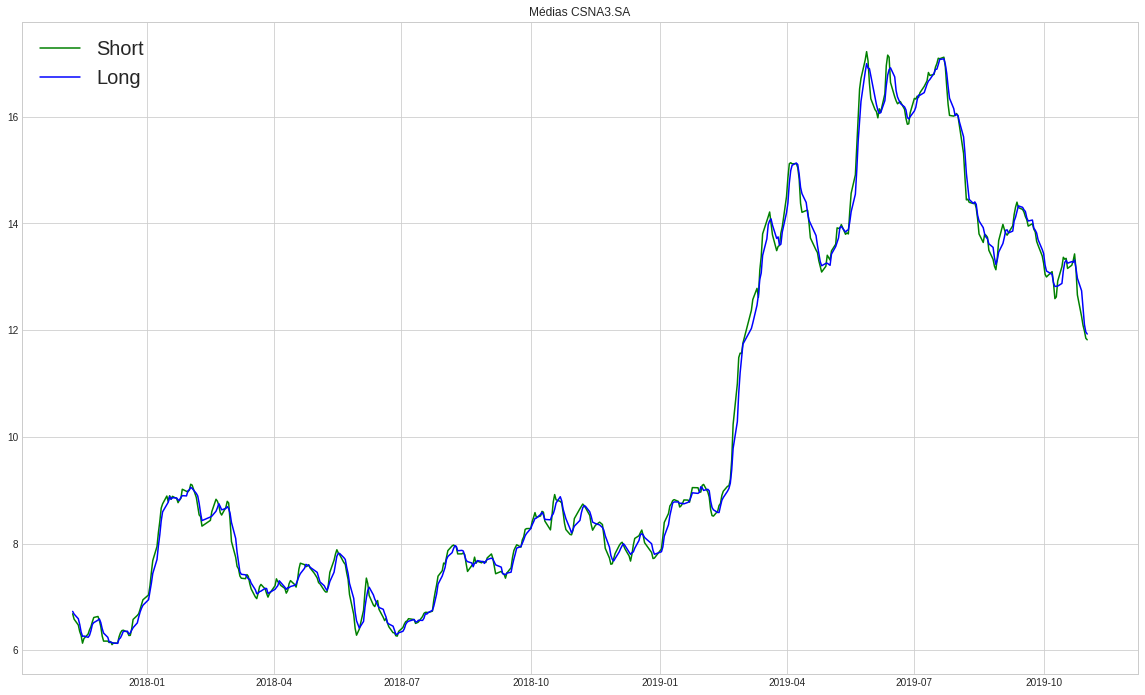

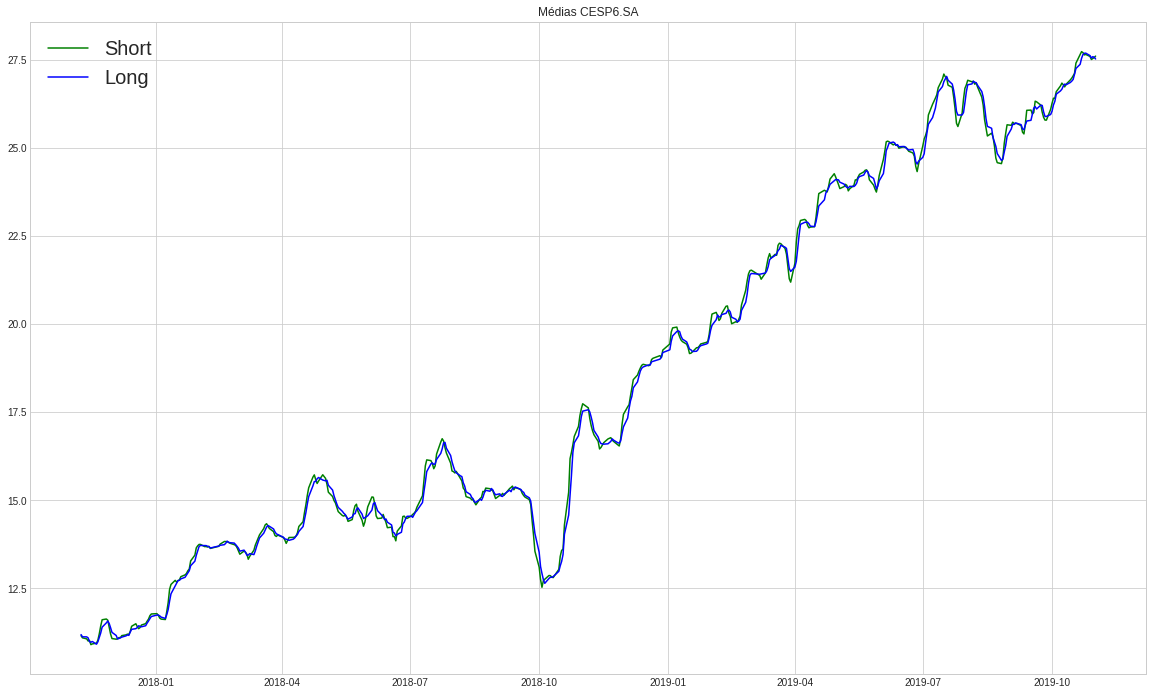

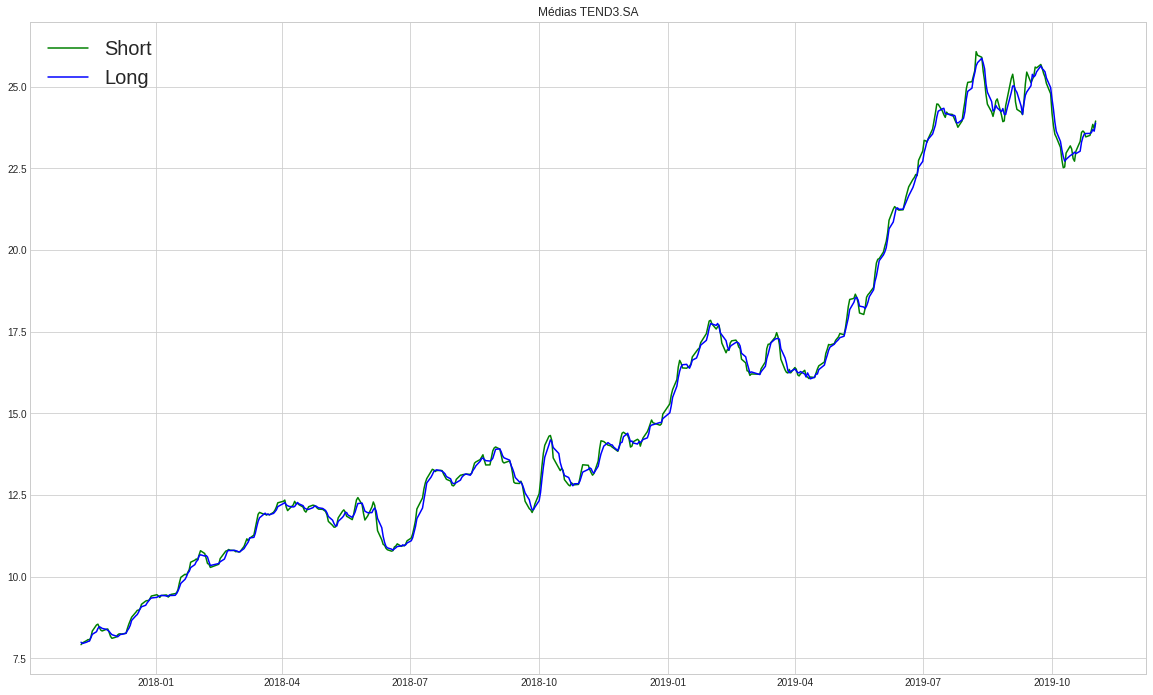

In [13]:
for each in train.columns: 
    ativo = each
    fig = plt.subplots(figsize=(20,12))
    plt.style.use('seaborn-whitegrid')
    plt.plot(train.index[4:], short[ativo], color = 'green', label = 'Short')
    plt.plot(train.index[4:], long[ativo], color = 'b', label = 'Long')
    plt.title("Médias {}".format(each))
    plt.legend(loc='upper left',fontsize=20)

## Estratégia crossover

In [14]:
long_short = {}
for each in train.columns:
    long_short[each] = [0 for i in range(train.shape[0])]
long_short = pd.DataFrame(data=long_short)

In [15]:
for each in tqdm(train.columns):
    for i in range(long.shape[0]):
        if short[each].iloc[i] > long[each].iloc[i]:
            long_short[each].loc[i] = 1
        else:
            long_short[each].loc[i] = 0

In [16]:
long_short.index = train.index

In [17]:
long_short.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-03,1,1,0,0,0
2017-11-06,1,1,0,0,1
2017-11-07,1,1,0,0,1
2017-11-08,0,1,0,0,1
2017-11-09,0,0,0,1,1


In [18]:
long_short_diff = long_short.diff()

In [19]:
long_short_diff.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-03,NaN,NaN,NaN,NaN,NaN
2017-11-06,0.0,0.0,0.0,0.0,1.0
2017-11-07,0.0,0.0,0.0,0.0,0.0
2017-11-08,-1.0,0.0,0.0,0.0,0.0
2017-11-09,0.0,-1.0,0.0,1.0,0.0


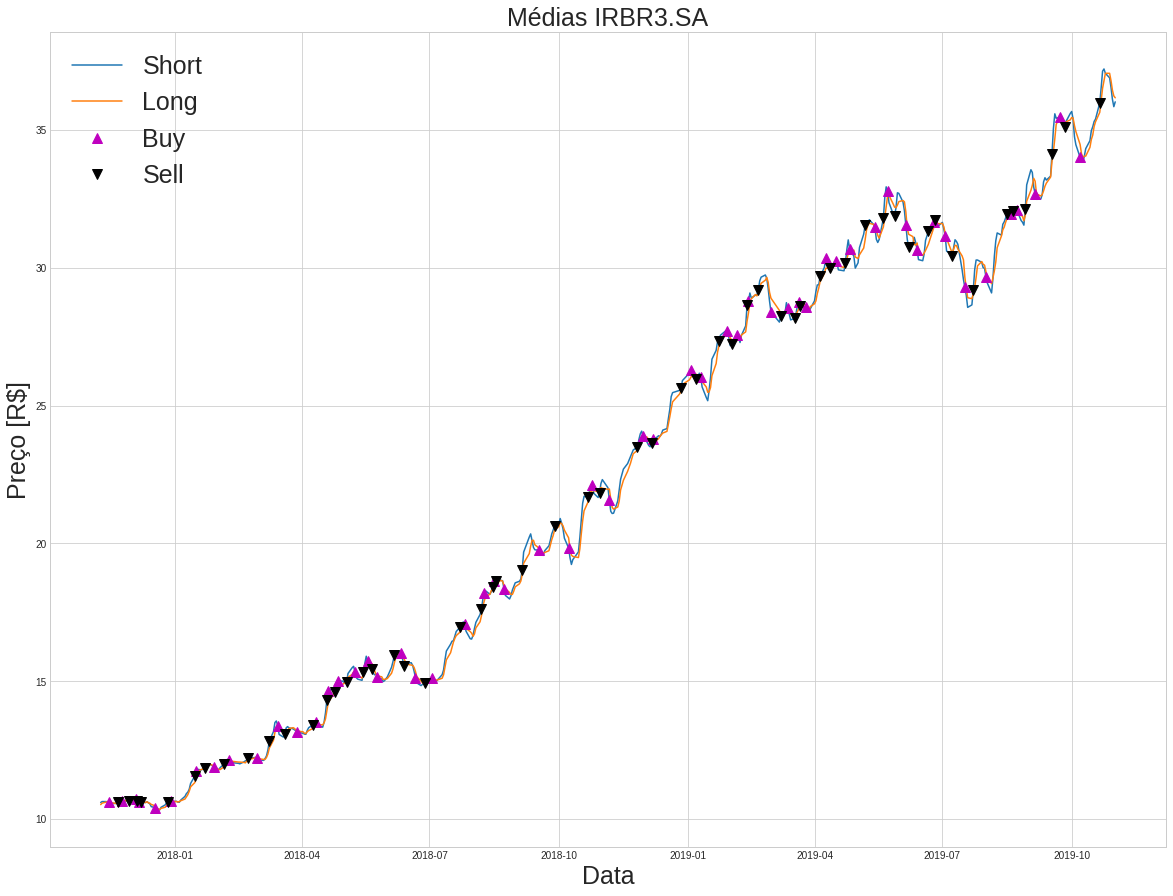

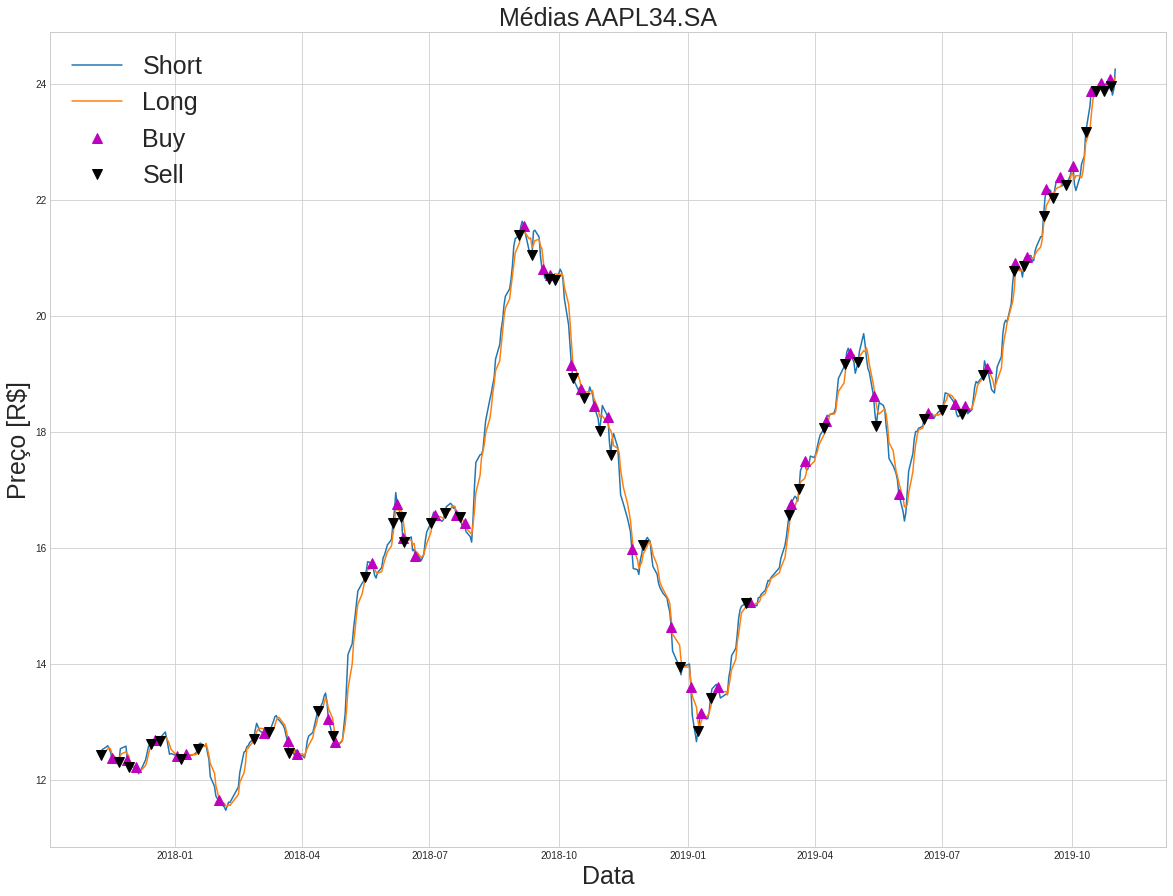

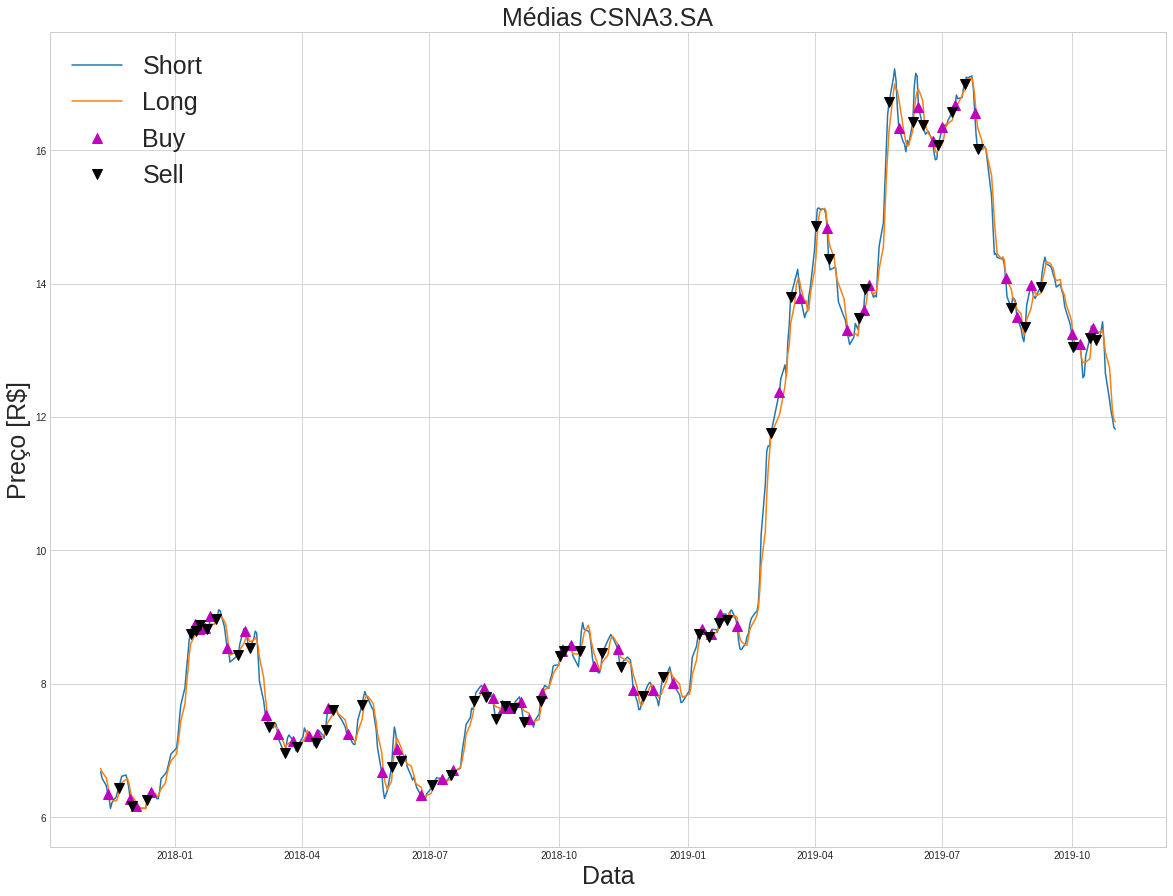

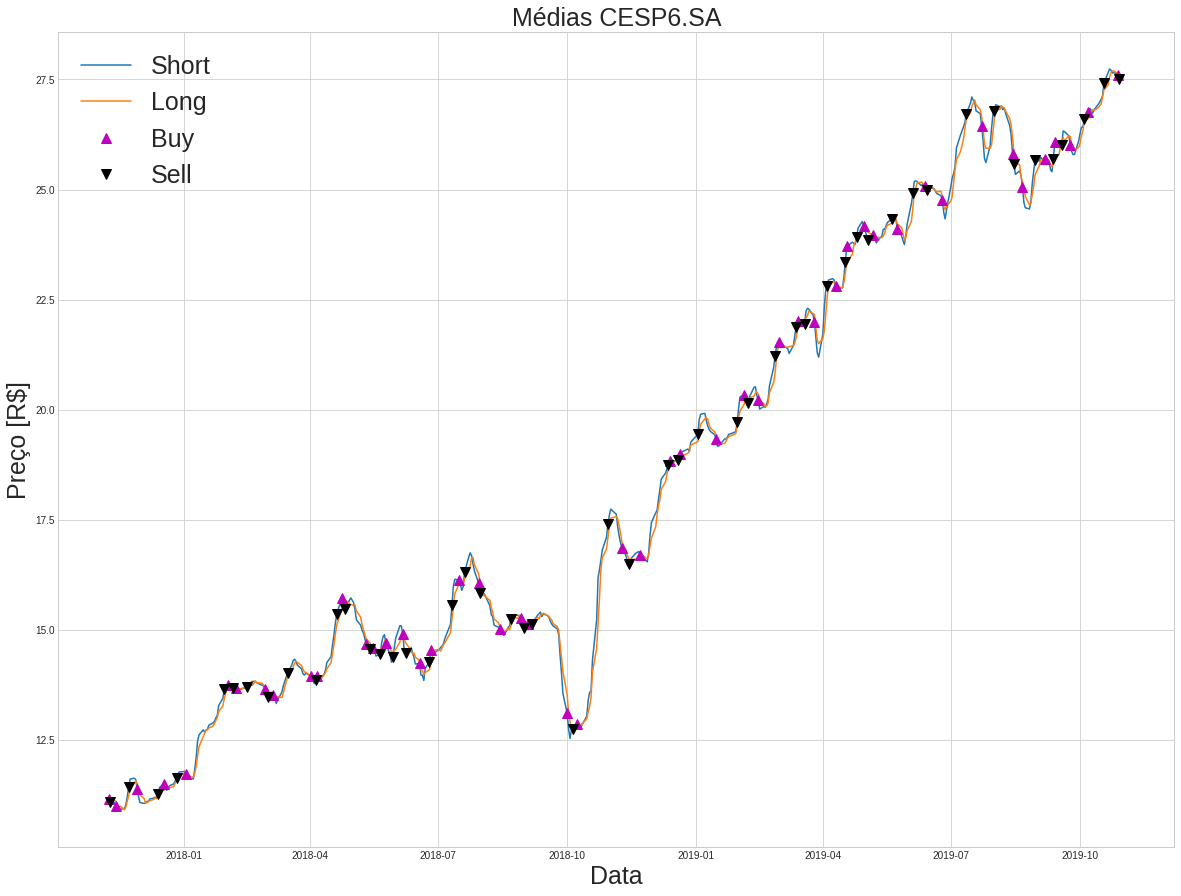

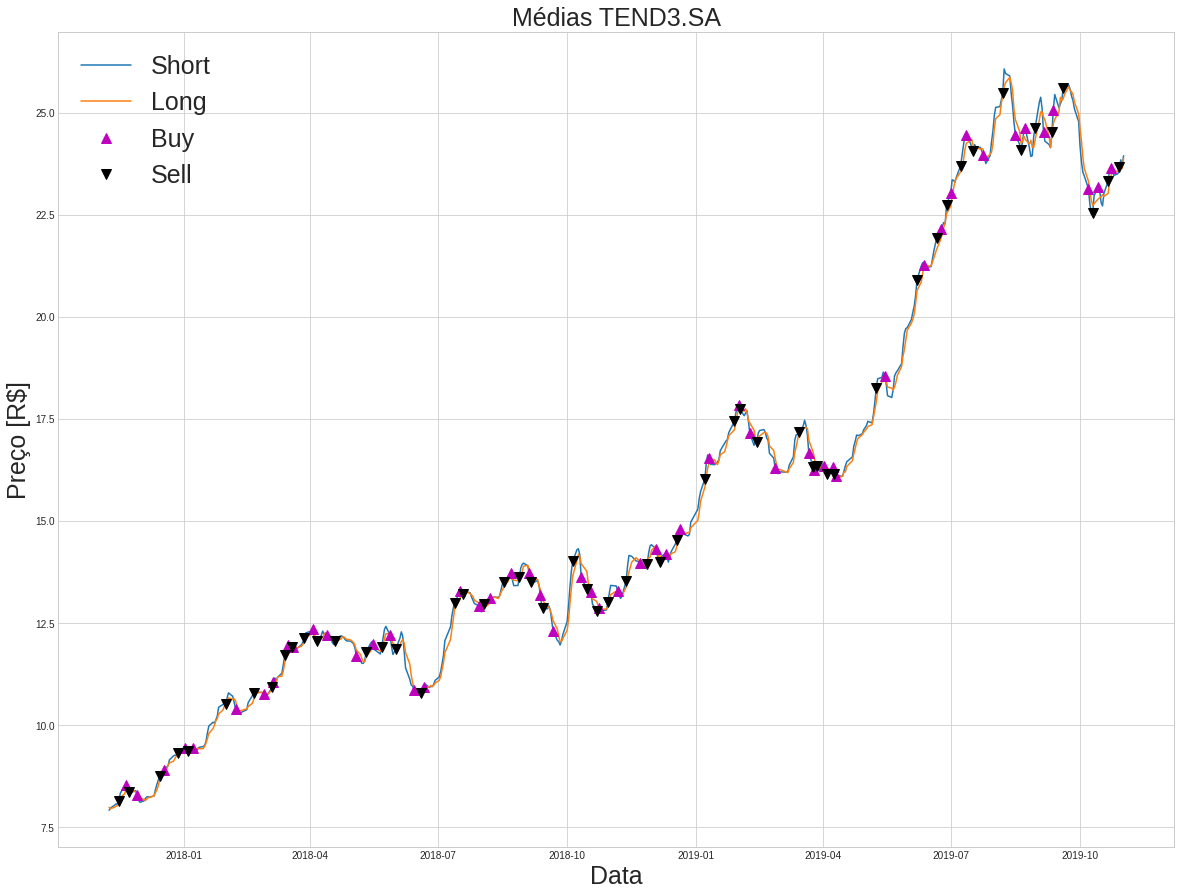

In [20]:
for each in train.columns:
    ativo = each
    fig = plt.subplots(figsize=(20,15))
    plt.style.use('seaborn-whitegrid')
    plt.plot(short[ativo], label='Short')
    plt.plot(long[ativo], label='Long')
    plt.ylabel("Preço [R$]",fontsize=25)
    plt.xlabel("Data",fontsize=25)
    plt.title("Médias {}".format(each),fontsize=25)
    plt.plot(short[ativo][long_short_diff[ativo] == 1.0].index, 
             short[ativo][long_short_diff[ativo] == 1.0],
             '^', markersize=10, color='m',label='Buy')
    plt.plot(short[ativo][long_short_diff[ativo] == -1.0].index, 
             short[ativo][long_short_diff[ativo] == -1.0],
             'v', markersize=10, color='k',label='Sell') 
    plt.legend(loc='upper left',fontsize=25)